In [97]:
#import the neccessary packages
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 4.1 & 4.2

We construct a graph such thath there exists a central node (0) which is connected to only two nodes (1,2). The nodes 1 and 2 have much larger degree, which means that the degree centrality is low, however the betweeness centrality is high as node(0) is present in most paths in the network.

0.2222222222222222 0.5555555555555556


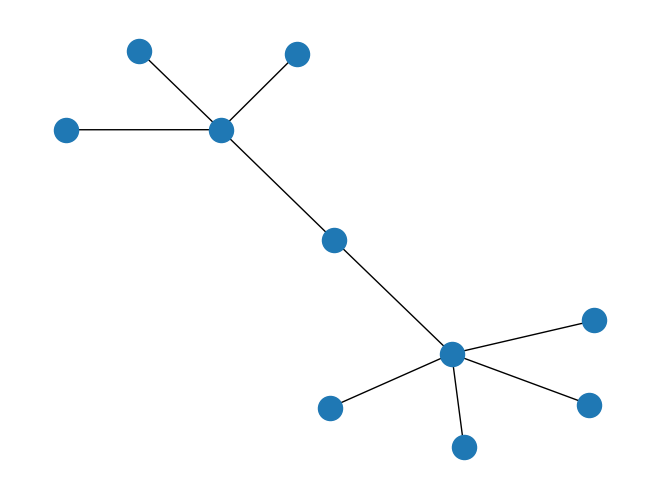

In [98]:
n=10
G=nx.empty_graph(n)   
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 6)
G.add_edge(2, 7)
G.add_edge(2, 8)
G.add_edge(2, 9)

nx.draw(G)

print(nx.degree_centrality(G)[0], nx.betweenness_centrality(G)[0])

# 4.3


matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]])

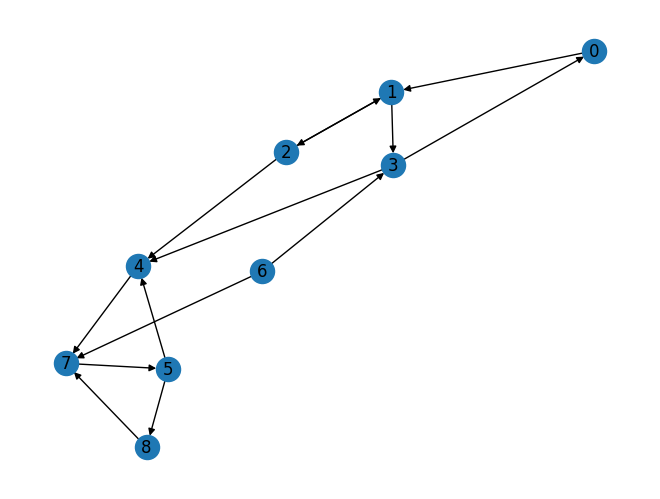

In [99]:
n=9
F=nx.empty_graph(n, create_using=nx.DiGraph())   
F.add_edge(0, 1)

F.add_edge(1, 2)
F.add_edge(1, 3)

F.add_edge(2, 4)
F.add_edge(2, 1)

F.add_edge(3, 0)
F.add_edge(3, 4)

F.add_edge(4, 7)

F.add_edge(5, 4)
F.add_edge(5, 8)

F.add_edge(6, 3)
F.add_edge(6, 7)

F.add_edge(7, 5)

F.add_edge(8, 7)

nx.draw(F, with_labels=True)

A=nx.to_numpy_matrix(F)

A

# 4.4

In [100]:
diag = np.array(list(map(lambda x: x[1], F.out_degree())))

M = np.zeros((n,n))

np.fill_diagonal(M, diag)
M_inv = np.linalg.inv(M)
T = np.matmul(M_inv, A)

print(T)

[[0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0. ]]


In [101]:
S = np.full((n,n), 1/n)

S[diag > 0, :] = (A / diag[None,:])[diag > 0, :] / diag

S


array([[0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]])

# 4.5

Not sure what to do here...

# 4.6

In [102]:
def page_rank(p, alpha, S):
    return  alpha * np.matmul(p, S) + (1-alpha) / n * np.ones(n).T

def compute_ps(alphas, iterations, S, p_inits):
    ps = []
    for alpha in alphas:
        for p_init in p_inits:
            p = p_init.copy()
            for i in range(iterations):
                p = page_rank(p.copy(), alpha, S)
                
            ps.append(p)
        
    return ps

ps = compute_ps([0.1, 0.85], 30, S, [np.full(n, 1/n)])

[0.11051332 0.10532866 0.10263322 0.10513322 0.13111201 0.10335362
 0.1        0.13414474 0.11033536]
[0.03924403 0.02989776 0.02301994 0.02656161 0.10401655 0.05318334
 0.01666667 0.17183828 0.06187224]


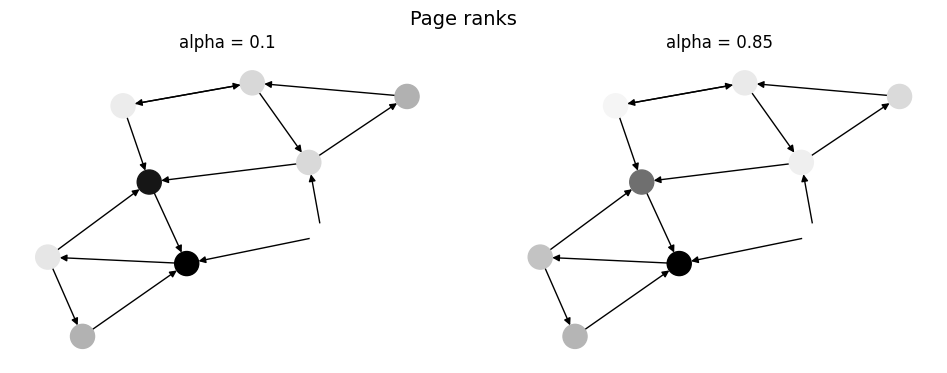

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("Page ranks", fontsize=14)
fig.tight_layout() 

p1 = nx.draw_kamada_kawai(F, ax=ax1, node_color=ps[0], cmap=plt.cm.binary)

nx.draw_kamada_kawai(F, ax=ax2, node_color=ps[1], cmap=plt.cm.binary)

ax1.set_title("alpha = 0.1")
ax2.set_title("alpha = 0.85")

print(ps[0])
print(ps[1])

# 4.7

In [104]:
ps = compute_ps([0.1], 1000, S, [np.full(n, 1/n), np.full(n, 1), np.random.rand(n), np.random.rand(n)])

[0.11051332 0.10532866 0.10263322 0.10513322 0.13111201 0.10335362
 0.1        0.13414474 0.11033536] 
 [0.11051332 0.10532866 0.10263322 0.10513322 0.13111201 0.10335362
 0.1        0.13414474 0.11033536] 
 [0.11051332 0.10532866 0.10263322 0.10513322 0.13111201 0.10335362
 0.1        0.13414474 0.11033536] 
 [0.11051332 0.10532866 0.10263322 0.10513322 0.13111201 0.10335362
 0.1        0.13414474 0.11033536]


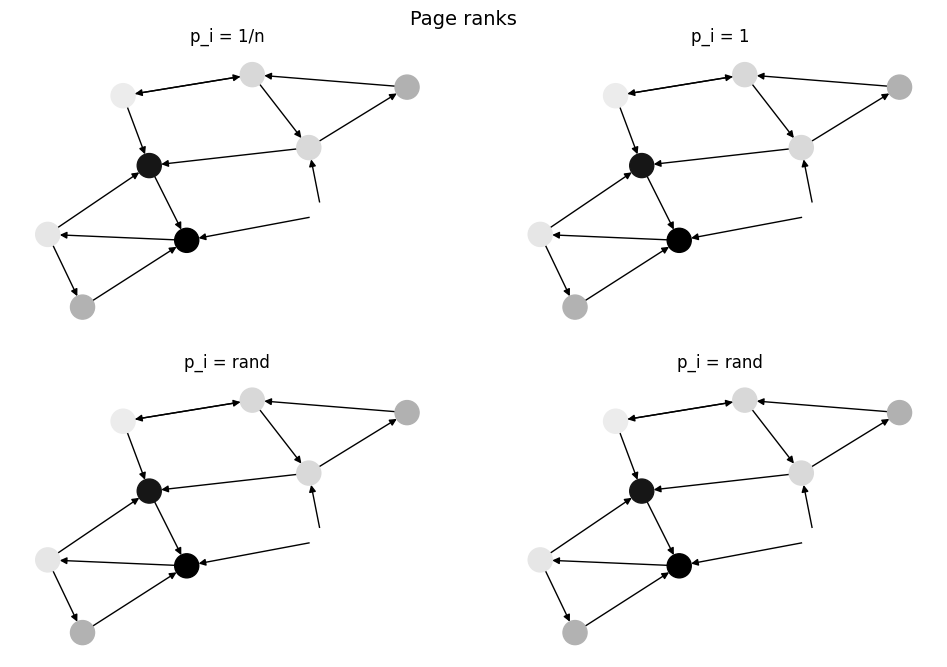

In [105]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle("Page ranks", fontsize=14)
fig.tight_layout() 

nx.draw_kamada_kawai(F, ax=axs[0,0], node_color=ps[0], cmap=plt.cm.binary)
nx.draw_kamada_kawai(F, ax=axs[0,1], node_color=ps[1], cmap=plt.cm.binary)
nx.draw_kamada_kawai(F, ax=axs[1,0], node_color=ps[2], cmap=plt.cm.binary)
nx.draw_kamada_kawai(F, ax=axs[1,1], node_color=ps[3], cmap=plt.cm.binary)


axs[0,0].set_title("p_i = 1/n")
axs[0,1].set_title("p_i = 1")
axs[1,0].set_title("p_i = rand")
axs[1,1].set_title("p_i = rand")

print(ps[0], '\n', ps[1], '\n', ps[2], '\n', ps[3])

The final results do not differ at all. It all converges to the leading eigenvector.

# 4.8

In [106]:
ps = compute_ps([0,1], 1000, S, [np.random.rand(n)])

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111] 
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 3.06621496e-101 2.22603020e-101 0.00000000e+000 1.33518484e-100
 3.06621496e-101]


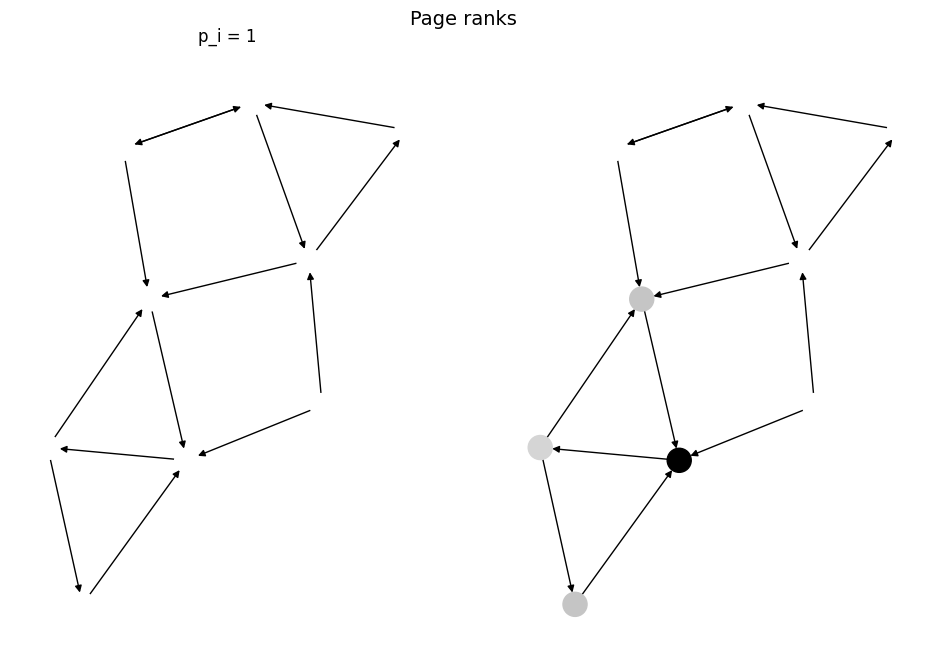

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
fig.suptitle("Page ranks", fontsize=14)
fig.tight_layout() 

nx.draw_kamada_kawai(F, ax=axs[0], node_color=ps[0], cmap=plt.cm.binary)
nx.draw_kamada_kawai(F, ax=axs[1], node_color=ps[1], cmap=plt.cm.binary)


axs[0].set_title("p_i = 1/n")
axs[0].set_title("p_i = 1")

print(ps[0], '\n', ps[1])

For edge case alpha = 0 the distribution converges to (1/n) for every entry. Which makes sense as only the term (1-alpha) / n * np.ones(n).T of the equation has an effect.
For the case alha = 1 the distribution is similar but just a lot more extreme.